In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [10]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [11]:
#assign a star a random value from the fluxes 
cluster_flux=[]
star=[]
cluster_size=2000
for i in range(cluster_size):
    cluster_flux.append(random.choice(flux_new))
    star.append(i)

In [12]:
#convert flux to mag
cluster_mag=[]
for i in range(len(cluster_flux)):
    mag=-2.5*np.log10(cluster_flux[i])
    cluster_mag.append(mag)

In [13]:
#make multi dimensional array for burst prob 
#let 1 be unburst and NaN be burst
t=500 #yrs
cadence=2
steps=t*cadence
burst_prob=1e-4/cadence
burst=np.ones((cluster_size,steps))
L=np.zeros((cluster_size,steps))

In [27]:
#set up a loop that sets the star that bursts to NaN for 100 years
burst_fraction=[]
cluster_new=[]
cluster_old=[]
star_new=[]
star_old=[]
bursts=0
for i in range(steps):
    for j in range(cluster_size):
        if burst[j,i]==1:
            prob=random.random()
            if prob>burst_prob:
                burst[j,i]=burst[j,i]
                L[j,i]=cluster_mag[j]
            if prob<=burst_prob:
                burst[j,i:200+i]=np.nan
                L[j,i:200+i]=cluster_mag[j]-5
                cluster_new.append(cluster_mag[j]-5)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])

In [15]:
#determine total number of bursts 
total=0
burst_total=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                total+=1
    burst_total.append(total)

In [18]:
#find the fraction at a time
burst_fraction=[]
fraction_val=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True:
            fraction_val+=1
    burst_fraction.append(fraction_val)
    fraction_val=0

In [19]:
fraction=[]
for i in range(len(burst_fraction)):
    fraction.append(burst_fraction[i]/cluster_size)

Text(500, 0, 't=500 years')

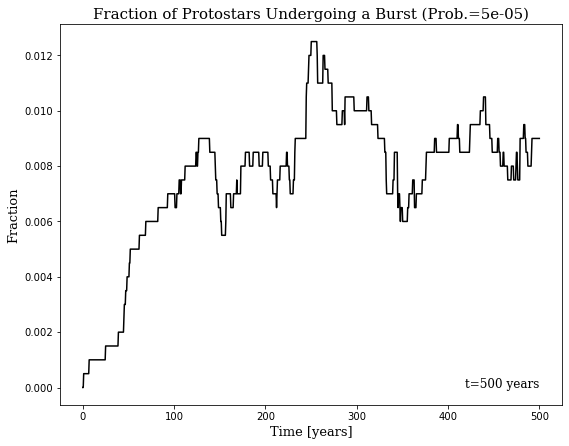

In [35]:
time=np.linspace(0,t,steps)
text="t={} years".format(t)
title='Fraction of Protostars Undergoing a Burst (Prob.={})'.format(burst_prob)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')
#plt.savefig('/Users/rachellee/Desktop/fraction_bursts.jpeg',dpi=300)

Text(500, 0, 't=500 years')

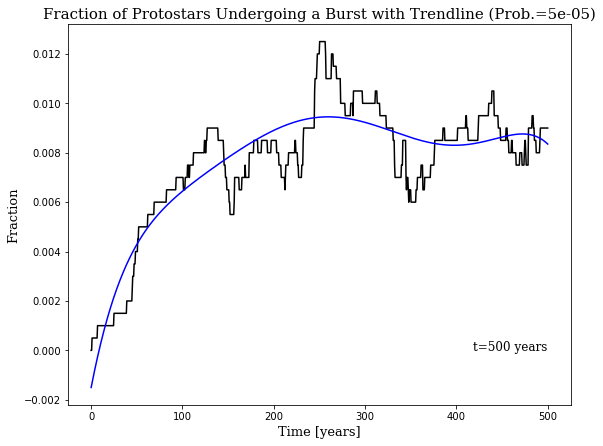

In [36]:
#fit a line to the graph
coef=np.polyfit(time,fraction,6)
poly1d_fn=np.poly1d(coef)
title2='Fraction of Protostars Undergoing a Burst with Trendline (Prob.={})'.format(burst_prob)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction,color='black')
ax.plot(time,poly1d_fn(time),color='blue')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title2,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')
#plt.savefig('/Users/rachellee/Desktop/fraction_bursts_trend.jpeg',dpi=300)

Text(500, 0, 't=500 years')

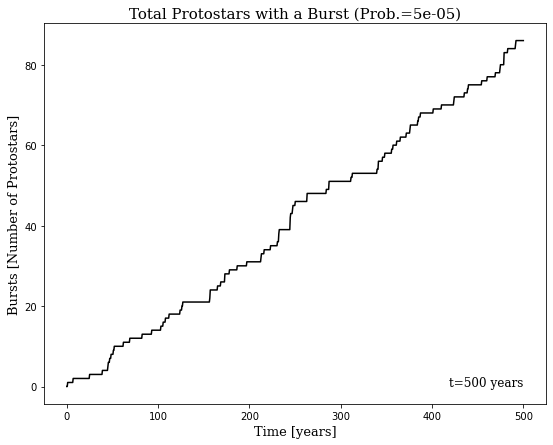

In [37]:
text="t={} years".format(t)
title3='Total Protostars with a Burst (Prob.={})'.format(burst_prob)
fig,ax=plt.subplots()
fig.set_size_inches(9,7)
ax.plot(time,burst_total,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax.set_title(title3,font='serif',fontsize=15)
ax.text(t,0,text,font='serif',fontsize=12,ha='right')
#plt.savefig('/Users/rachellee/Desktop/total_bursts.jpeg',dpi=300)

Text(500, 0, 't=500 years')

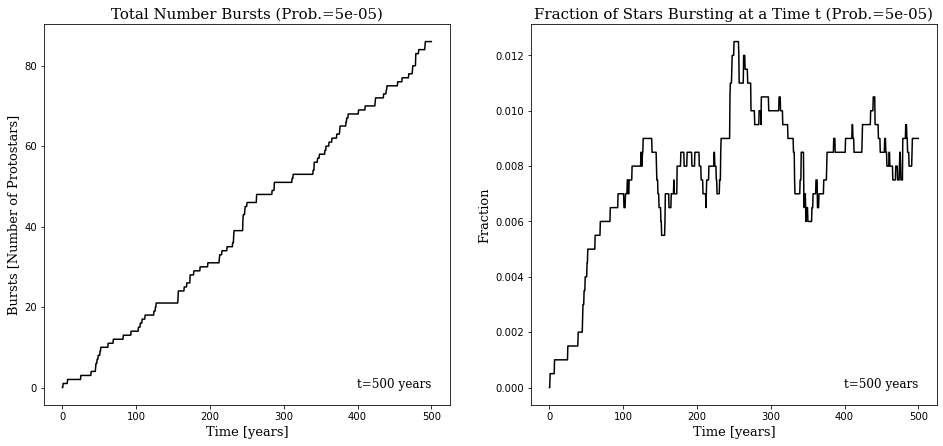

In [38]:
title4='Total Number Bursts (Prob.={})'.format(burst_prob)
title5='Fraction of Stars Bursting at a Time t (Prob.={})'.format(burst_prob)
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(16,7)
ax1.plot(time,burst_total,color='black')
ax1.set_xlabel('Time [years]',font='serif',fontsize=13)
ax1.set_ylabel('Bursts [Number of Protostars]',font='serif',fontsize=13)
ax1.set_title(title4,font='serif',fontsize=15)
ax1.text(t,0,text,font='serif',fontsize=12,ha='right')
ax2.plot(time,fraction,color='black')
ax2.set_xlabel('Time [years]',font='serif',fontsize=13)
ax2.set_ylabel('Fraction',font='serif',fontsize=13)
ax2.set_title(title5,font='serif',fontsize=15)
ax2.text(t,0,text,font='serif',fontsize=12,ha='right')
#plt.savefig('/Users/rachellee/Desktop/comp_bursts_normal.jpeg',dpi=300)

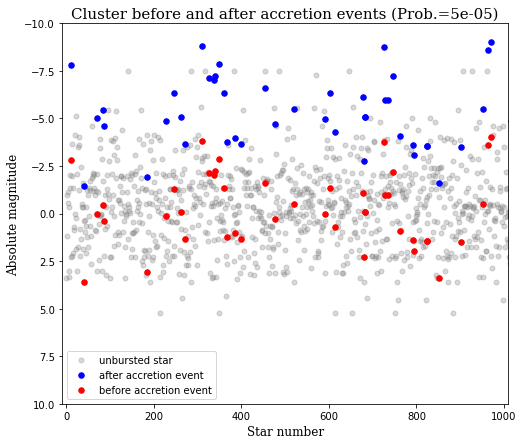

In [39]:
text_comp='Cluster before and after accretion events (Prob.={})'.format(burst_prob)
fig,ax=plt.subplots(1,1)
fig.set_size_inches(8,7)
ax.scatter(star,cluster_mag,color='grey',alpha=0.3,s=25,label='unbursted star')
ax.scatter(star_new,cluster_new,color='blue',label='after accretion event',alpha=1,s=30)
ax.scatter(star_old,cluster_old,color='red',label='before accretion event',alpha=1,s=30)
ax.set_xlim(-10,1010)
ax.set_ylim(-10,10)
ax.set_title(text_comp,font='serif',fontsize=15)
ax.set_xlabel('Star number',font='serif',fontsize=12)
ax.set_ylabel('Absolute magnitude',font='serif',fontsize=12)
ax.legend(loc='best')
plt.gca().invert_yaxis()
#plt.savefig('/Users/rachellee/Desktop/cluster_view.jpeg',dpi=300)